# ST 590-651 Project 2 Part 3: NFL Game Scores Data Analysis

*Performed by Group G: Raiden Han, Jingjing Li, Nataliya Peshekhodko*

*06/27/2022*

## Introduction and Module Preparation

In this section, we will analyze the [National Football League(NFL) game data](https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv) from the NCSU online data file, using `PySpark` for data processing and `Pandas` and `Matplotlib` for visualization.

To begin with, since this notebook will be running on Windows and is affected by the virtual environment configuration, we need to set up temporary environment variables to ensure the smooth operation of `PySpark`.

In [1]:
# Prepare the environment for Windows operation systems
import os
import sys
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

Next, we need to load the required modules and functions and do some basic configuration.

The new Spark session is set to use four CPU cores for parallel computation. In addition, we will change the default index type and the arrow to speed up the operation.

In [2]:
# Import the modules
import pandas as pd
import matplotlib.pyplot as plt
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark import SparkFiles

# Create a new Spark session
spark = SparkSession.builder.master(
    "local[4]").appName("my_app").getOrCreate()

# Configurate the Spark session
ps.set_option("compute.default_index_type", "distributed")
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", True)

## Data Analysis in `PySpark`

First, we will read the remote .csv file via URL as a Spark SQL DataFrame.

In [3]:
# Read the .csv file from the url
url = 'https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv'
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("scoresFull.csv"), header=True)

We will define two lists containing the numeric variables we are interested in - away quarter and final scores and home quarter and final scores - for subsequent use.

In [4]:
# Identify numerical variables
num_vars = ['AQ1', 'AQ2', 'AQ3', 'AQ4', 'AFinal',
            'HQ1', 'HQ2', 'HQ3', 'HQ4', 'HFinal']
quarter_vars = ['AQ1', 'AQ2', 'AQ3', 'AQ4', 'HQ1', 'HQ2', 'HQ3', 'HQ4']

We will use the built-in methods of Spark SQL DataFrame to calculate the mean and standard deviation of all ten numeric variables above. Due to PySpark's optimization algorithm, we do not need to build our MapReduce model.

In [5]:
# Calculate the mean
avg = df.agg({var: 'avg' for var in num_vars})
avg.show()

+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+
|      avg(AFinal)|        avg(AQ3)|         avg(HQ2)|      avg(HFinal)|         avg(AQ4)|         avg(HQ1)|          avg(AQ1)|         avg(HQ3)|         avg(HQ4)|         avg(AQ2)|
+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+
|20.55718813022184|4.38692019590896|7.105157015269374|23.17401325266494|5.890233362143475|4.828867761452031|3.9248055315471047|4.791126476519735|6.322961682512244|6.241428983002017|
+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+



In [6]:
# Calculate the standard deviation
std = df.agg({var: 'std' for var in num_vars})
std.show()

+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+
|    stddev(AFinal)|      stddev(AQ3)|       stddev(HQ2)|    stddev(HFinal)|      stddev(AQ4)|      stddev(HQ1)|      stddev(AQ1)|      stddev(HQ3)|      stddev(HQ4)|       stddev(AQ2)|
+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+
|10.195585841440776|4.632716825002489|5.7027880761372725|10.405951744024184|5.278775371882617|4.726903424009668|4.490700421089049|4.755144845943295|5.417310283450343|5.2215934529573085|
+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+



Similarly, we can calculate the above two statistics for data grouped by season.

In [7]:
# Calculate the mean grouped by seasons
avg_by_season = df.groupby('season').agg({var: 'avg' for var in num_vars})
avg_by_season.show()

+------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|season|       avg(AFinal)|          avg(AQ3)|          avg(HQ2)|       avg(HFinal)|          avg(AQ4)|          avg(HQ1)|          avg(AQ1)|          avg(HQ3)|          avg(HQ4)|          avg(AQ2)|
+------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  2012|21.655430711610485|  4.50936329588015|  7.00374531835206|24.119850187265918| 6.235955056179775| 4.928838951310861| 4.468164794007491| 5.217228464419476| 6.823970037453184| 6.273408239700374|
|  2014|21.295880149812735| 4.734082397003745| 7.164794007490637|23.973782771535582| 5.876404494382022| 4.913857677902621| 4.284644194756554| 5.397003745318352|6.3745318352059925| 6.322097378277154|
|  20

In [8]:
# Calculate the standard deviation grouped by seasons
std_by_season = df.groupby('season').agg({var: 'std' for var in num_vars})
std_by_season.show()

+------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+
|season|    stddev(AFinal)|       stddev(AQ3)|       stddev(HQ2)|    stddev(HFinal)|       stddev(AQ4)|      stddev(HQ1)|       stddev(AQ1)|       stddev(HQ3)|      stddev(HQ4)|      stddev(AQ2)|
+------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+
|  2012| 10.36700586582552| 4.627771103085967| 5.379925180001318| 10.55991939940039| 5.338234491542525|4.504654209720631| 4.754293429927693|4.5427794268808634|5.675672459168211|5.452819233053018|
|  2014| 9.780605611153137|5.0598373811825486|  6.11381680118567|10.870878612249262| 5.243299106476734|4.821247898934106| 4.893745832711619|5.1845336805684195|5.329216822540802|  4.7692229255708|
|  2013| 9.680199379

## Data Visualization

To visualize the data, we need to convert the Spark SQL DataFrame into a pandas DataFrame.

In [9]:
# Convert the Pyspark.SQL DataFrame to a Pandas DataFrame
avg_by_season_df = avg_by_season.toPandas()
avg_by_season_df.head()

,season,avg(AFinal),avg(AQ3),avg(HQ2),avg(HFinal),avg(AQ4),avg(HQ1),avg(AQ1),avg(HQ3),avg(HQ4),avg(AQ2)
0,2012,21.655431,4.509363,7.003745,24.119850,6.235955,4.928839,4.468165,5.217228,6.823970,6.273408
1,2014,21.295880,4.734082,7.164794,23.973783,5.876404,4.913858,4.284644,5.397004,6.374532,6.322097
2,2013,21.977528,5.011236,7.445693,24.891386,6.183521,5.112360,4.044944,5.258427,6.932584,6.670412
3,2005,18.786517,4.029963,7.426966,22.314607,5.191011,4.393258,3.887640,4.677903,5.737828,5.543071
4,2002,20.640449,4.449438,7.411985,23.018727,5.928839,4.307116,4.037453,4.715356,6.426966,6.022472


Looking at the table above, we will remove the two columns of the final scores since we are only interested in the quarterly data. In addition, we will make some adjustments to the column names and order and set the seasons as the index for subsequent plotting.

In [10]:
# Change the column names
avg_by_season_df.columns = [col.replace("avg(", "").replace(")", "")
                            for col in avg_by_season_df.columns]
# Set the season as the index
avg_by_season_df.sort_values('season', inplace=True)
avg_by_season_df.set_index('season', inplace=True)
# Select the columns with interest
quarter_avg_by_season_df = avg_by_season_df[quarter_vars]
quarter_avg_by_season_df.head()

,AQ1,AQ2,AQ3,AQ4,HQ1,HQ2,HQ3,HQ4
season,,,,,,,,
2002,4.037453,6.022472,4.449438,5.928839,4.307116,7.411985,4.715356,6.426966
2003,3.558052,6.093633,3.913858,5.355805,5.026217,6.625468,4.561798,6.295880
2004,3.913858,6.265918,4.153558,5.797753,4.943820,7.071161,4.250936,6.561798
2005,3.887640,5.543071,4.029963,5.191011,4.393258,7.426966,4.677903,5.737828
2006,3.629213,6.179775,4.303371,6.063670,4.606742,6.041199,4.565543,5.932584


After completing the table processing, we can draw the following image.

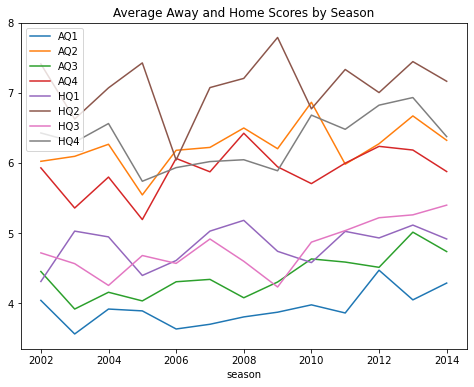

In [11]:
# Plot the quarter variables
fig, ax = plt.subplots(figsize=(8, 6))
quarter_avg_by_season_df.plot(ax=ax)
ax.set_title("Average Away and Home Scores by Season")
plt.show()

As can be seen in the chart above, while there is some fluctuation in the average score from season to season, by and large, the second quarter scores are higher than the fourth quarter scores and higher than the first and third quarter scores. In addition, the average home scores are higher than the average away scores in the same quarter.